# Image Bijective Graph
This is a graph that connects different images types 

In [1]:
from pyMeasure.Code.DataHandlers.GraphModels import *
from pyMeasure.Code.Analysis.SParameter import *
import PIL
import os
import re
import base64
from scipy import misc

Importing Code.Utils.Names
Importing Code.DataHandlers.NISTModels
Importing Code.DataHandlers.GeneralModels
Importing Code.DataHandlers.TouchstoneModels
Importing Code.DataHandlers.XMLModels
Importing Code.DataHandlers.RadiCALModels
Importing Code.DataHandlers.ZipModels
Importing Code.DataHandlers.Translations
Importing Code.DataHandlers.StatistiCALModels
Importing Code.DataHandlers.MUFModels
Importing Code.Analysis.SParameter
Importing Code.InstrumentControl.Instruments
Importing Code.InstrumentControl.Experiments


In [2]:
im=PIL.Image.open('Rectangular_Graph_plot_20161130_001.png')

In [3]:
file_name='Rectangular_Graph_plot_20161130_001.png'
directory=os.getcwd()
def png_to_jpg(png_file_name):
    [root_name,extension]=png_file_name.split(".")
    jpeg_file_name=root_name+".jpg"
    PIL.Image.open(png_file_name).save(jpeg_file_name)
    return jpeg_file_name
def file_to_Image(file_path):
    new_image=PIL.Image.open(file_path)
    if re.search(".gif",file_path,re.IGNORECASE):
        new_image=new_image.convert("RGB")
    return new_image

def Image_to_file(pil_image,file_path=None):
    if file_path is None:
        file_path=pil_image.filename
    pil_image.save(file_path)
    return file_path

def Image_to_file_type(pil_image,file_path=None,extension="png"):
    
    if file_path is None:
        file_path=pil_image.filename
    root_name=file_path.split(".")[0]
    new_file_name=root_name+"."+extension.replace(".","")
    if re.search('jp|bmp',extension,re.IGNORECASE):
        pil_image.convert('RGB')
    print("{0} is {1}".format("pil_image.mode",pil_image.mode))
    pil_image.save(new_file_name)
    return new_file_name
    
def Image_to_thumbnail(pil_image,file_path="thumbnail.jpg"):
    size = (64, 64)
    temp_image=pil_image.copy()
    temp_image.thumbnail(size)
    temp_image.save(file_path)
    return file_path

def png_to_base64(file_name):
    in_file=open(file_name, "rb")
    encoded=base64.b64encode(in_file.read())
    return encoded

def base64_to_png(base64_encoded_png,file_name="test.png"):
    out_file=open(file_name, "wb")
    decoded=base64.b64decode(base64_encoded_png)
    out_file.write(decoded)
    out_file.close()
    return file_name
 
    
def png_to_ndarray(file_name):
    nd_array=misc.imread(file_name)
    return nd_array

def ndarray_to_png(nd_array,file_name="test.png"):
    misc.imsave(file_name,nd_array)
    return file_name

# change this to base64png
def base64png_to_embeded_html(base64_encoded_png):
    html_string="<img src='data:image/png;base64,{0}' />".format(base64_encoded_png)
    return html_string

def embeded_html_to_base64png(html_string):
    pattern=re.compile("<img src='data:image/png;base64,(?P<data>.+)' />")
    match=re.search(pattern,html_string)
    if match:
        encoded=match.groupdict()["data"]
    else:
        raise
    return encoded

def ndarray_to_matplotlib(nd_array):
    figure=plt.imshow(nd_array)
    figure.axes.get_xaxis().set_visible(False)
    figure.axes.get_yaxis().set_visible(False)
    plt.show()
    
def ndarray_to_MatplotlibFigure(nd_array):
    plt.close()
    figure=plt.figure("Image",frameon=False)
    plt.figimage(nd_array,resize=True)
    return figure

def MatplotlibFigure_to_png(figure,file_name="test.png"):
    figure.savefig(file_name,bbox_inches='tight', pad_inches=0,dpi="figure")
    return file_name

In [4]:
graph_options={"graph_name":"Image Graph",
                  "node_names":['Image','png'],
                  "node_descriptions":["PIL Image","png"],
                  "current_node":'Image',
                  "state":[1,0],
                  "data":im,
                  "edge_2_to_1":file_to_Image,
                  "edge_1_to_2":lambda x: Image_to_file_type(x,file_path="test",extension="png")
                 }
image_graph=Graph(**graph_options)

In [5]:
image_graph.show()

In [6]:
image_graph.add_node("jpg","Image",lambda x: Image_to_file_type(x,file_path="test",extension="jpg"),
                     "Image",file_to_Image,node_description="Jpg File")
image_graph.add_node("tiff","Image",lambda x: Image_to_file_type(x,file_path="test",extension="tiff"),
                     "Image",file_to_Image,node_description="Tif File")
image_graph.add_node("gif","Image",lambda x: Image_to_file_type(x,file_path="test",extension="gif"),
                     "Image",file_to_Image,node_description="Gif File")
image_graph.add_node("bmp","Image",lambda x: Image_to_file_type(x,file_path="test",extension="bmp"),
                     "Image",file_to_Image,node_description="BMP File")
image_graph.add_node("base64","png",png_to_base64,
                     "png",base64_to_png,node_description="Base 64 PNG")
image_graph.add_node("embededHTML","base64",base64png_to_embeded_html,
                     "base64",embeded_html_to_base64png,node_description="Embeded HTML of PNG")
image_graph.add_node("ndarray","png",png_to_ndarray,
                     "png",ndarray_to_png,node_description="Numpy Array")
image_graph.add_node("MatplotlibFigure","ndarray",ndarray_to_MatplotlibFigure,
                     "png",MatplotlibFigure_to_png,node_description="MatplotlibFigure")
image_graph.add_external_node("thumbnail","Image",Image_to_thumbnail,external_node_description="JPEG Thumbnail")
image_graph.add_external_node("matplotlib","ndarray",ndarray_to_matplotlib,
                              external_node_description="Matplotlib Plot")

In [7]:
image_graph.show(descriptions=True)

In [8]:
from ipywidgets import *
from IPython.display import Image,display,HTML
image_graph.set_state("Image",im)
def move_and_show(node_name):
    image_graph.move_to_node(node_name)
    print("{0}".format(node_name))
    if node_name is "Image":
        print("PIL Image Class")
    elif node_name in ["png","jpg"]:
        display(Image(image_graph.data,embed=True))
    elif node_name in ["base64"]:
        display(HTML("<img src='data:image/png;base64,{0}' />".format(image_graph.data)))
    elif node_name in ["embededHTML"]:
        display(HTML(image_graph.data))
        #print image_graph.data 
    elif node_name in ["ndarray"]:
        figure=plt.figimage(image_graph.data,resize=True)
        plt.show()
    elif node_name in ["MatplotlibFigure"]:
        plt.show()
    else:
        display(HTML("<img src='{0}' />".format(image_graph.data)))
interact(move_and_show,node_name=image_graph.node_names)

['edge_Image_png_000', 'edge_png_Image_000']
moving Image -> png
pil_image.mode is RGBA
moving png -> Image
Image


<function __main__.move_and_show>

In [9]:
image_graph.jump_to_external_node("thumbnail")

['edge_Image_png_000', 'edge_png_Image_000']
moving Image -> png
pil_image.mode is RGBA
moving png -> Image


'thumbnail.jpg'

In [10]:
image_graph.show()

In [11]:
from scipy.io import savemat,loadmat
new_figure=loadmat("PropagationConstant.fig")

In [12]:
def fig_to_matplotlib(filename,fignr=1):
    "Function that uses loadmat to create a matplotlib plot of a matlab fig file"
    from scipy.io import loadmat
    from numpy import size
    from matplotlib.pyplot import plot,figure,hold,xlabel,ylabel,show,clf,xlim,legend
    d = loadmat(filename,squeeze_me=True, struct_as_record=False)
    ax1 = d['hgS_070000'].children
    if size(ax1) > 1:
        legs= ax1[1]
        ax1 = ax1[0]
    else:
        legs=0
    figure(fignr)
    clf()
    hold(True)
    counter = 0    
    for line in ax1.children:
        if line.type == 'graph2d.lineseries':
            if hasattr(line.properties,'Marker'):
                mark = "%s" % line.properties.Marker
                mark = mark[0]
            else:
                mark = '.'
            if hasattr(line.properties,'LineStyle'):
                linestyle = "%s" % line.properties.LineStyle
            else:
                linestyle = '-'
            if hasattr(line.properties,'Color'):
                r,g,b =  line.properties.Color
            else:
                r = 0
                g = 0
                b = 1
            if hasattr(line.properties,'MarkerSize'):
                marker_size = line.properties.MarkerSize
            else:
                marker_size = 1                
            x = line.properties.XData
            y = line.properties.YData
            plot(x,y,marker=mark,linestyle=linestyle,color=(r,g,b),markersize=marker_size)
        elif line.type == 'text':
            if counter <1:
                #print(dir(line.properties))
                counter += 1
            elif counter < 2:
                #print dir(line.properties.String)
                xlabel("%s" % line.properties.String,fontsize = 16)
                counter += 1 
            elif counter < 3:
                #print dir(line.properties.String)
                ylabel("%s" % line.properties.String,fontsize = 16)
                counter += 1 
    xlim(ax1.properties.XLim)
    if legs:        
        leg_entries = tuple(legs.properties.String)
        py_locs = ['upper center','lower center','right','left','upper right','upper left','lower right','lower left','best']
        MAT_locs=['North','South','East','West','NorthEast', 'NorthWest', 'SouthEast', 'SouthWest','Best']
        Mat2py = dict(zip(MAT_locs,py_locs))
        location = legs.properties.Location
        legend(leg_entries,loc=Mat2py[location])
    hold(False)
    show()

In [13]:
fig_to_matplotlib("PropagationConstant.fig")

In [14]:
fig_to_matplotlib("CharacteristicImpedance.fig")

<img src="test.png" />

In [15]:
image_graph.jump_to_external_node("matplotlib")

['edge_Image_png_000', 'edge_png_ndarray_000']
moving Image -> png
pil_image.mode is RGBA
moving png -> ndarray


In [16]:
def ndarray_to_MatplotlibFigure(nd_array):
    plt.close()
    figure=plt.figure("Image",frameon=False)
    plt.figimage(nd_array,resize=True)
#     image.axes.get_xaxis().set_visible(False)
#     image.axes.get_yaxis().set_visible(False)
    #ax = plt.Axes(figure, [0., 0., 1., 1.])
    #ax.set_axis_off()
    #figure.add_axes(ax)
    return figure

def MatplotlibFigure_to_png(figure,file_name="test.png"):
    figure.savefig(file_name,bbox_inches='tight', pad_inches=0,dpi="figure")
    return file_name
image_graph.add_node("MatplotlibFigure","ndarray",ndarray_to_MatplotlibFigure,
                     "png",MatplotlibFigure_to_png,node_description="MatplotlibFigure")

In [17]:
ndarray=image_graph.data

In [18]:
fig=ndarray_to_MatplotlibFigure(ndarray)

In [19]:
plt.show()

In [20]:
#png=MatplotlibFigure_to_png(figure)

In [21]:
#type(fig)

In [22]:
figure=plt.figure("Matlab")
fig_to_matplotlib("PropagationConstant.fig")
png=MatplotlibFigure_to_png(figure)
image_graph.set_state("png",png)
interact(move_and_show,node_name=image_graph.node_names)

['edge_png_Image_000']
moving png -> Image
Image


<function __main__.move_and_show>

In [23]:
image_graph.show()

In [24]:
plt.close()

In [25]:
image_graph.jump_to_external_node("thumbnail")

['edge_Image_png_000', 'edge_png_Image_000']
moving Image -> png
pil_image.mode is RGBA
moving png -> Image


'thumbnail.jpg'

['edge_base64_png_000']
moving base64 -> png
png


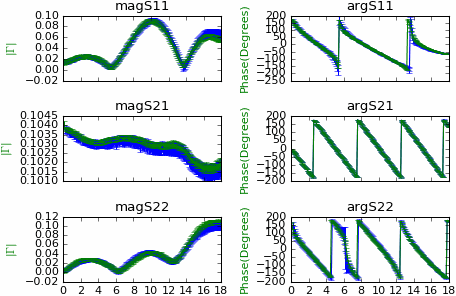

In [50]:
#table=OnePortCalrepModel(os.path.join(TESTS_DIRECTORY,'700437.asc'))
#table=SNP(os.path.join(TESTS_DIRECTORY,'Solution_0.s4p'))
table=TwoPortCalrepModel(os.path.join(r"C:\Share\ascii.dut\2014",'CTN208.asc'))
raw=TwoPortRawModel(os.path.join(r"C:\Share\Ck_Std_raw_ascii",'CTN208.L26_121399'))
new_calrep=calrep(raw)

figure=plot_calrep_comparision([table,new_calrep])
png=MatplotlibFigure_to_png(figure)
image_graph.set_state("png",png)
interact(move_and_show,node_name=image_graph.node_names)

In [27]:
plt.close()

In [28]:
table.show()

In [29]:
table=OnePortCalrepModel(os.path.join(TESTS_DIRECTORY,'700437.asc'))
table.show()

The self.metadata["Device_Id"] variable is 700437


In [30]:
out=plot_calrep(new_calrep)

average_columns is ['magS11', 'argS11', 'magS21', 'argS21', 'magS22', 'argS22']
Length of x is 181, Length of y is 181, Length of error is 181
Length of x is 181, Length of y is 181, Length of error is 181
Length of x is 181, Length of y is 181, Length of error is 181


In [31]:
plot_calrep_comparision([new_calrep,new_calrep])

average_columns is ['magS11', 'argS11', 'magS21', 'argS21', 'magS22', 'argS22']


In [33]:
table=TwoPortCalrepModel(os.path.join(r"C:\Share\ascii.dut\2014",'CTN208.asc'))
raw=TwoPortRawModel(os.path.join(r"C:\Share\Ck_Std_raw_ascii",'CTN208.L26_121399'))
new_calrep=calrep(raw)
plot_calrep_comparision([table,new_calrep])

average_columns is ['magS11', 'argS11', 'magS21', 'argS21', 'magS22', 'argS22']


average_columns is ['magS11', 'argS11', 'magS21', 'argS21', 'magS22', 'argS22']
Length of x is 179, Length of y is 179, Length of error is 179
Length of x is 179, Length of y is 179, Length of error is 179
Length of x is 179, Length of y is 179, Length of error is 179


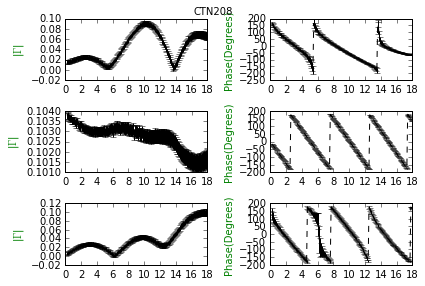

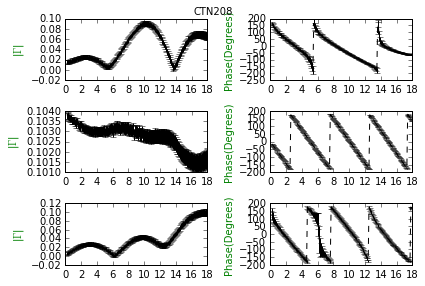

In [35]:
%matplotlib inline
plot_calrep(table)

average_columns is ['magS11', 'argS11', 'magS21', 'argS21', 'magS22', 'argS22']


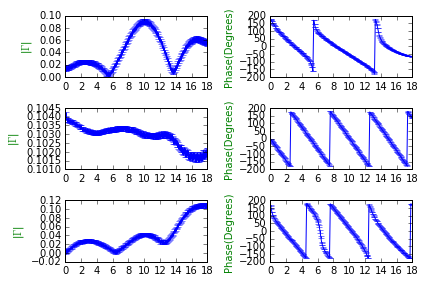

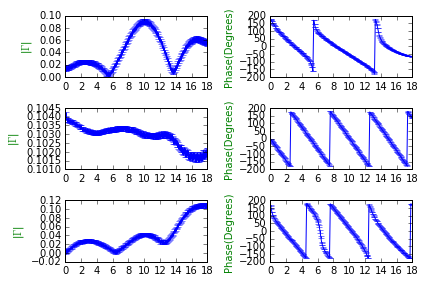

In [40]:
plot_calrep_comparision([table,new_calrep])

In [48]:
def plot_calrep_comparision(calrep_model_list):
    """Plots many calrep models on the same axis with uncertainities"""
    plt.close()
    for index,calrep_model in enumerate(calrep_model_list):
        if type(calrep_model) in [PowerCalrepModel,TwoPortCalrepModel]:
            calrep_model_list[index].joined_table.metadata=calrep_model.metadata
            calrep_model_list[index]=calrep_model.joined_table

        # Uncertainties all have u in them 
    average_columns=[]
    for column_name in calrep_model_list[0].column_names[:]:
            if re.search("mag|arg|eff",column_name,re.IGNORECASE):
                average_columns.append(column_name)
    print("{0} is {1}".format("average_columns",average_columns))
    number_plots=len(average_columns)
    number_rows=int(round(number_plots/2.))
    number_models=len(calrep_model_list)
    fig, axes = plt.subplots(nrows=number_rows, ncols=2, sharex='col')
    plt.hold(True)
    for model_index,calrep_model in enumerate(calrep_model_list):
        curve_color=(1-float(model_index+1)/number_models,0,float(model_index+1)/number_models,.5)
        for plot_index,ax in enumerate(axes.flat):
            column_name=average_columns[plot_index]
            ax.set_title(column_name)
            if re.search("mag",column_name,re.IGNORECASE):
                error_letter="M"
                error_parameter=column_name.replace("mag","")
                error_name="u"+error_letter+"g"+error_parameter
                error=calrep_model[error_name]
                x=calrep_model["Frequency"]
                y=calrep_model[column_name]
                ax.errorbar(x,y,yerr=error)
                ax.set_ylabel(r'|${\Gamma} $|',color='green')
            elif re.search("arg",column_name,re.IGNORECASE):
                error_letter="A"
                error_parameter=column_name.replace("arg","")
                error_name="u"+error_letter+"g"+error_parameter
                error=calrep_model[error_name]
                x=calrep_model["Frequency"]
                y=calrep_model[column_name]
                ax.errorbar(x,y,yerr=error)
                ax.set_ylabel('Phase(Degrees)',color='green')
            elif re.search("eff",column_name,re.IGNORECASE):
                error_letter="E"
                error_parameter=""
                try:
                    error_name="u"+error_letter+"g"+error_parameter
                    error=calrep_model[error_name]
                except:
                    error_name="u"+error_letter+"e"+error_parameter
                    error=calrep_model[error_name]

                x=calrep_model["Frequency"]
                y=calrep_model[column_name]
                ax.errorbar(x,y,yerr=error)
                ax.set_ylabel('Phase(Degrees)',color='green')
                break
    plt.tight_layout()
    plt.show()
    return fig

The self.metadata["Device_Id"] variable is CTN102
average_columns is ['magS11', 'argS11']


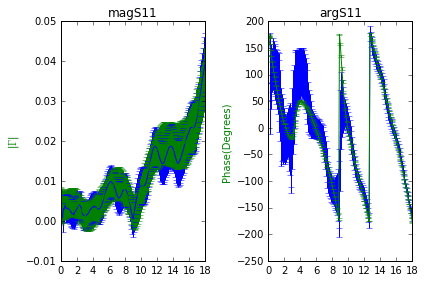

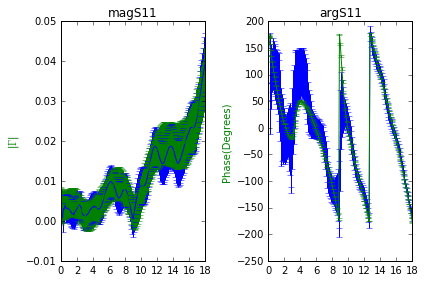

In [49]:
old_calrep=OnePortCalrepModel(os.path.join(r"C:\Share\ascii.dut\2014",'CTN102.asc'))
raw=OnePortRawModel(os.path.join(r"C:\Share\Ck_Std_raw_ascii",'CTN102.R5_061913'))
new_calrep=calrep(raw)
plot_calrep_comparision([old_calrep,new_calrep])

In [53]:
class ImageGraph(Graph):
    """A transformation graph for images node types are image formats and external nodes are 
    common image processing functions"""
    def __init__(self,**options):
        defaults={"graph_name":"Image Graph",
                  "node_names":['Image','png'],
                  "node_descriptions":["PIL Image","png"],
                  "current_node":'Image',
                  "state":[1,0],
                  "data":im,
                  "edge_2_to_1":file_to_Image,
                  "edge_1_to_2":lambda x: Image_to_file_type(x,file_path="test",extension="png")}
        self.options={}
        for key,value in defaults.iteritems():
            self.options[key]=value
        for key,value in options.iteritems():
            self.options[key]=value
        Graph.__init__(self,**self.options)
        self.add_node("jpg","Image",lambda x: Image_to_file_type(x,file_path="test",extension="jpg"),
                             "Image",file_to_Image,node_description="Jpg File")
        self.add_node("tiff","Image",lambda x: Image_to_file_type(x,file_path="test",extension="tiff"),
                             "Image",file_to_Image,node_description="Tif File")
        self.add_node("gif","Image",lambda x: Image_to_file_type(x,file_path="test",extension="gif"),
                             "Image",file_to_Image,node_description="Gif File")
        self.add_node("bmp","Image",lambda x: Image_to_file_type(x,file_path="test",extension="bmp"),
                             "Image",file_to_Image,node_description="BMP File")
        self.add_node("base64","png",png_to_base64,
                             "png",base64_to_png,node_description="Base 64 PNG")
        self.add_node("embededHTML","base64",base64png_to_embeded_html,
                             "base64",embeded_html_to_base64png,node_description="Embeded HTML of PNG")
        self.add_node("ndarray","png",png_to_ndarray,
                             "png",ndarray_to_png,node_description="Numpy Array")
        self.add_node("MatplotlibFigure","ndarray",ndarray_to_MatplotlibFigure,
                             "png",MatplotlibFigure_to_png,node_description="MatplotlibFigure")
        self.add_external_node("thumbnail","Image",Image_to_thumbnail,external_node_description="JPEG Thumbnail")
        self.add_external_node("matplotlib","ndarray",ndarray_to_matplotlib,
                                      external_node_description="Matplotlib Plot")

In [54]:
new_graph=ImageGraph()

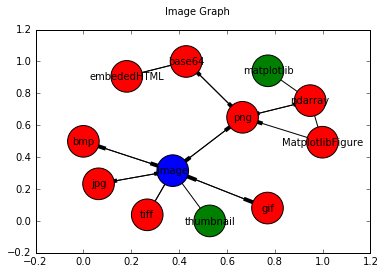

In [55]:
new_graph.show()

In [56]:
new_graph.set_state("jpg","JellyFish.jpg")

In [57]:
def move_and_show(node_name,graph=image_graph):
    graph.move_to_node(node_name)
    print("{0}".format(node_name))
    if node_name is "Image":
        print("PIL Image Class")
    elif node_name in ["png","jpg"]:
        display(Image(graph.data,embed=True))
    elif node_name in ["base64"]:
        display(HTML("<img src='data:image/png;base64,{0}' />".format(graph.data)))
    elif node_name in ["embededHTML"]:
        display(HTML(graph.data))
        #print image_graph.data 
    elif node_name in ["ndarray"]:
        figure=plt.figimage(graph.data,resize=True)
        plt.show()
    elif node_name in ["MatplotlibFigure"]:
        plt.show()
    else:
        display(HTML("<img src='{0}' />".format(graph.data)))


equality_list is [False, True, False, True, False, True, False, True, False, False]
equality_list is [False, True, False, True, False, True, False, True, False, False]
equality_list is [False, True, False, True, False, True, False, True, False, False]
equality_list is [False, True, False, True, False, True, False, True, False, False]
['edge_bmp_Image_000', 'edge_Image_png_000', 'edge_png_base64_000', 'edge_base64_embededHTML_000']
moving bmp -> Image
moving Image -> png
pil_image.mode is RGB
moving png -> base64
moving base64 -> embededHTML
embededHTML



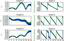

In [67]:
interact(lambda node_name:move_and_show(node_name,new_graph),node_name=image_graph.node_names)

In [65]:
thumb=new_graph.jump_to_external_node("thumbnail")

['edge_png_Image_000']
moving png -> Image


In [66]:
new_graph.set_state("jpg",thumb)

average_columns is ['magS11', 'argS11', 'magS21', 'argS21', 'magS22', 'argS22']


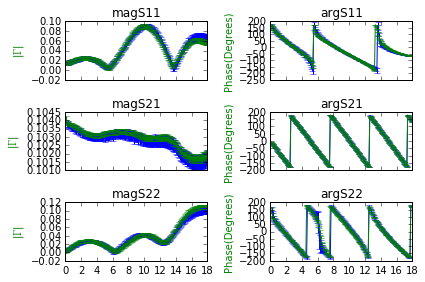

In [63]:
table=TwoPortCalrepModel(os.path.join(r"C:\Share\ascii.dut\2014",'CTN208.asc'))
raw=TwoPortRawModel(os.path.join(r"C:\Share\Ck_Std_raw_ascii",'CTN208.L26_121399'))
new_calrep=calrep(raw)

figure=plot_calrep_comparision([table,new_calrep])
png=MatplotlibFigure_to_png(figure)
new_graph.set_state("png",png)

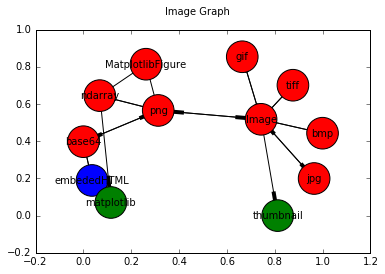

In [70]:
new_graph.show()
    